In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
X = diabetes.data
y = diabetes.target

In [3]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = diabetes.feature_names
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
#df = df["age"]
#df.head()

In [5]:
import numpy as np
#x = np.array(df["age"])
x = df['age'].values
#x

In [6]:
from sklearn import model_selection
x_train , x_test , y_train , y_test = model_selection.train_test_split(x,y)

In [7]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()

In [8]:
x_train2d = x_train.reshape(-1,1)                #All rows, 1 Column
alg.fit(x_train2d,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
x_test2d = x_test.reshape(-1,1)

y_pred = alg.predict(x_test2d)

In [10]:
alg.coef_

array([284.89882677])

In [11]:
m = alg.coef_[0]
m

284.89882676972024

In [12]:
c = alg.intercept_
c

151.79342346341602

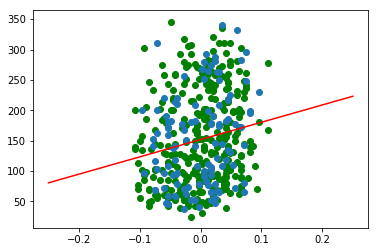

In [17]:
import matplotlib.pyplot as plt
x_line = np.linspace(-1/4,1/4,1000)
y_line = m*x_line + c         #Line Predicted by LR
plt.plot(x_line,y_line,"r")
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test)
plt.show()


In [16]:
alg.score(x_test2d,y_test)

0.0460229353045305

In [15]:
alg.score(x_train2d,y_train)


0.03155354760176432

<h> <b> Lets Try Normalizing </b> </h>

In [21]:
print(x.max())
print(x.min())
print(x.mean())
print(y.max())
print(y.min())
print(y.mean())

0.110726675453815
-0.107225631607358
-3.6396225400041895e-16
346.0
25.0
152.13348416289594


In [25]:
xN = (x-x.mean()) / (x.max() - x.min())
yN = (y-y.mean()) / (y.max() - y.min())

In [26]:
xN_train , xN_test , yN_train , yN_test = model_selection.train_test_split(xN,yN)

In [27]:
xN_train2d = xN_train.reshape(-1,1) 
xN_test2d = xN_test.reshape(-1,1)


In [23]:
alg1 = LinearRegression()

In [31]:
alg1.fit(xN_train2d,yN_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
y1_pred = alg.predict(xN_test2d)
print(alg1.score(xN_test2d,yN_test))
print(alg1.score(xN_train2d,yN_train))

0.0479210714219378
0.02799472611963305


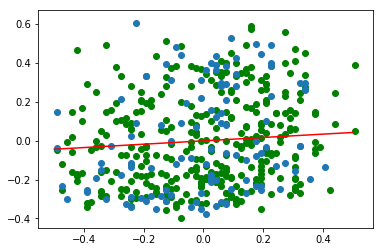

In [36]:
import matplotlib.pyplot as plt
x1_line = np.linspace(-1/2,1/2,1000)
y1_line = alg1.coef_[0]*x_line + alg1.intercept_         #Line Predicted by LR
plt.plot(x1_line,y1_line,"r")
plt.scatter(xN_train,yN_train,color='green')
plt.scatter(xN_test,yN_test)
plt.show()
